In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import re
import collections

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import Image as im

In [49]:
df = pd.read_excel("Datasets/realDonaldTrump.xlsx", sep='\t', 
                   names=["Tweet_ID", "Date", "Text"])

In [50]:
#Excel file did not have a proper heading so we needed to create one
##Ref: https://stackoverflow.com/questions/34091877/how-to-add-header-row-to-a-pandas-dataframe
df = pd.DataFrame(df)
df.head()

,Tweet_ID,Date,Text
0,1267227396341669889,2020-05-31 22:52:09,LAW &amp; ORDER!
1,1267216774304497669,2020-05-31 22:09:57,RT @realDonaldTrump: Much more “disinformation...
2,1267216497686056960,2020-05-31 22:08:51,Our National Guard stopped them cold last nigh...
3,1267214346578518016,2020-05-31 22:00:18,RT @realDonaldTrump: Crossing State lines to i...
4,1267214265762680832,2020-05-31 21:59:59,RT @dbongino: The radical-left formally divorc...


In [23]:
#Create recent wordcloud and most common words that Donald Trump has tweeted since the George Floyd murder by cops
tweets = df["Text"]

In [24]:
tweets

0                                       LAW &amp; ORDER!
1      RT @realDonaldTrump: Much more “disinformation...
2      Our National Guard stopped them cold last nigh...
3      RT @realDonaldTrump: Crossing State lines to i...
4      RT @dbongino: The radical-left formally divorc...
5      RT @BuckSexton: This isn’t going to stop until...
6      SO TERRIBLE! Where are the arrests and LONG TE...
7                      STRENGTH! https://t.co/xHE5AdK9Ka
8                      STRENGTH! https://t.co/xHE5AdK9Ka
9      Get tough Democrat Mayors and Governors. These...
10     Law &amp; Order in Philadelphia, NOW! They are...
11     RT @TomFitton: Antifa has been engaging in ter...
12     The Lamestream Media is doing everything withi...
13     The United States of America will be designati...
14     Other Democrat run Cities and States should lo...
15     Congratulations to our National Guard for the ...
16     RT @realDonaldTrump: The National Guard has be...
17     RT @Mike_Pence: Today, @

In [25]:
raw_string = ''.join(tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [26]:
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, any smaller words ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS] #from a built in list of stopwords

In [33]:
words

['law',
 'amp',
 'orderrt',
 'realdonaldtrump',
 'much',
 'disinformation',
 'coming',
 'cnn',
 'msdnc',
 'nytimes',
 'washingtonpost',
 'far',
 'coming',
 'foreour',
 'national',
 'guard',
 'stopped',
 'cold',
 'last',
 'night',
 'called',
 'sooner',
 'realdonaldtrump',
 'crossing',
 'state',
 'lines',
 'incite',
 'violence',
 'federal',
 'crime',
 'liberal',
 'governors',
 'mayors',
 'must',
 'much',
 'tougher',
 'thert',
 'dbongino',
 'radicalleft',
 'formally',
 'divorced',
 'america',
 'last',
 'night',
 'domestic',
 'terrorists',
 'enemies',
 'united',
 'start',
 'bucksexton',
 'isnt',
 'going',
 'stop',
 'good',
 'guys',
 'willing',
 'use',
 'overwhelming',
 'force',
 'bad',
 'guysso',
 'terrible',
 'arrests',
 'long',
 'term',
 'jail',
 'sentences',
 'tough',
 'democrat',
 'mayors',
 'governors',
 'people',
 'anarchists',
 'call',
 'national',
 'guard',
 'now',
 'world',
 'amp',
 'order',
 'philadelphia',
 'now',
 'looting',
 'stores',
 'call',
 'great',
 'national',
 'guard',


In [55]:
words = [w for w in words if w != 'realdonaldtrump']
words = [w for w in words if w != 'amp']
words = [w for w in words if w != 'will']
words

['law',
 'orderrt',
 'much',
 'disinformation',
 'coming',
 'cnn',
 'msdnc',
 'nytimes',
 'washingtonpost',
 'far',
 'coming',
 'foreour',
 'national',
 'guard',
 'stopped',
 'cold',
 'last',
 'night',
 'called',
 'sooner',
 'crossing',
 'state',
 'lines',
 'incite',
 'violence',
 'federal',
 'crime',
 'liberal',
 'governors',
 'mayors',
 'must',
 'much',
 'tougher',
 'thert',
 'dbongino',
 'radicalleft',
 'formally',
 'divorced',
 'america',
 'last',
 'night',
 'domestic',
 'terrorists',
 'enemies',
 'united',
 'start',
 'bucksexton',
 'isnt',
 'going',
 'stop',
 'good',
 'guys',
 'willing',
 'use',
 'overwhelming',
 'force',
 'bad',
 'guysso',
 'terrible',
 'arrests',
 'long',
 'term',
 'jail',
 'sentences',
 'tough',
 'democrat',
 'mayors',
 'governors',
 'people',
 'anarchists',
 'call',
 'national',
 'guard',
 'now',
 'world',
 'order',
 'philadelphia',
 'now',
 'looting',
 'stores',
 'call',
 'great',
 'national',
 'guard',
 'finally',
 'tomfitton',
 'antifa',
 'engaging',
 'terr

In [56]:
logo = np.array(Image.open('Datasets/10wmt-superJumbo-v4.jpg'))

In [57]:
#Use same Twitter Bird logo for this section of the project
wc = WordCloud(background_color="white", max_words=100, mask=logo)
clean_string = ','.join(words)
wc.generate(clean_string)

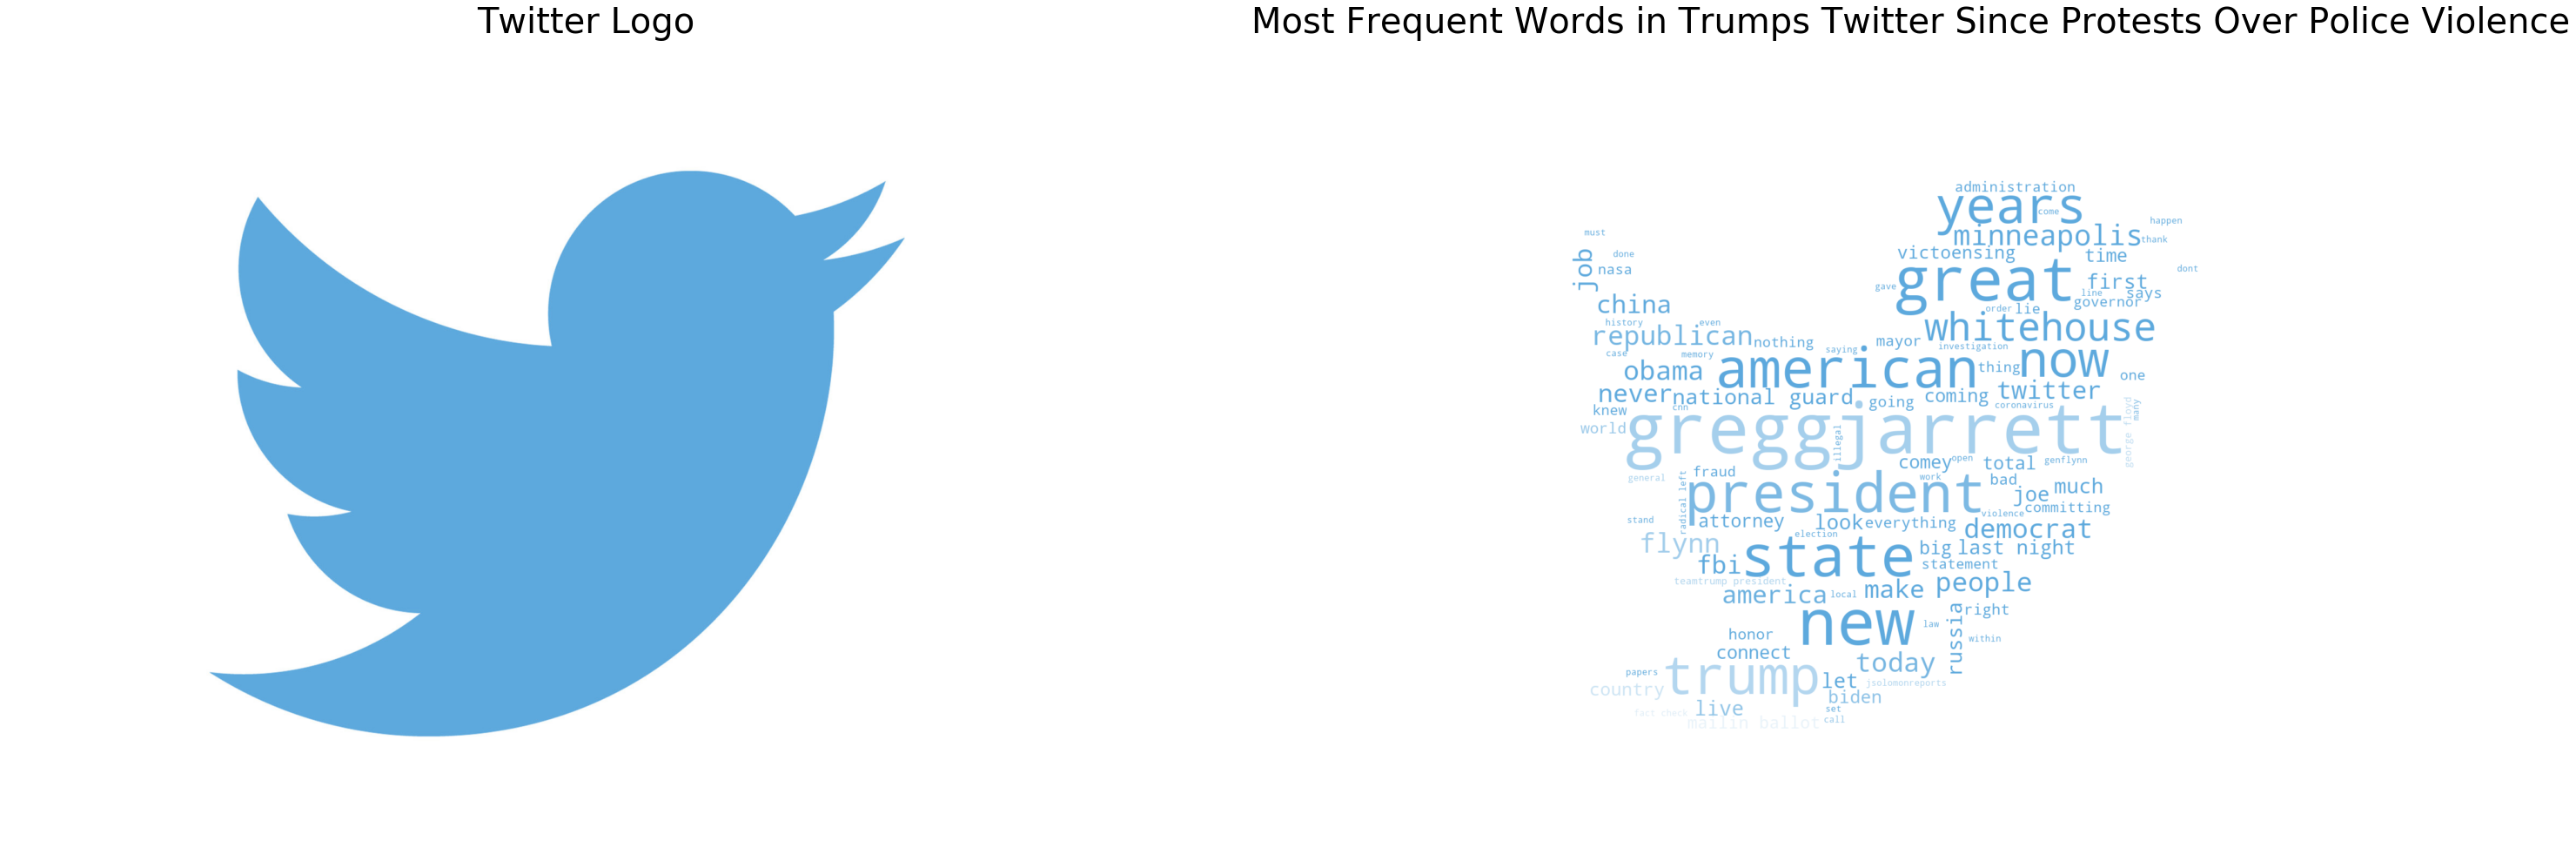

In [58]:
#Side by Side Comparison, the Twitter Logo will be reused because the logo is relevant and overall neutral
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(logo, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Twitter Logo', size=40)
plt.axis("off")

image_colors_1 = ImageColorGenerator(logo)

f.add_subplot(1,2, 2)
plt.imshow(wc.recolor(color_func=image_colors_1), interpolation='bilinear')
plt.title('Most Frequent Words in Trumps Twitter Since Protests Over Police Violence', size=40)
plt.axis("off")

plt.savefig("Visualizations/Words_Most_Common_Since_Floyd_Protests")
plt.show()

In [59]:
# Top 50 Words
frequent_words = [word for word in words]
counted_words = collections.Counter(frequent_words)

words_list = []
counts = []
for letter, count in counted_words.most_common(20):
    words_list.append(letter)
    counts.append(count)

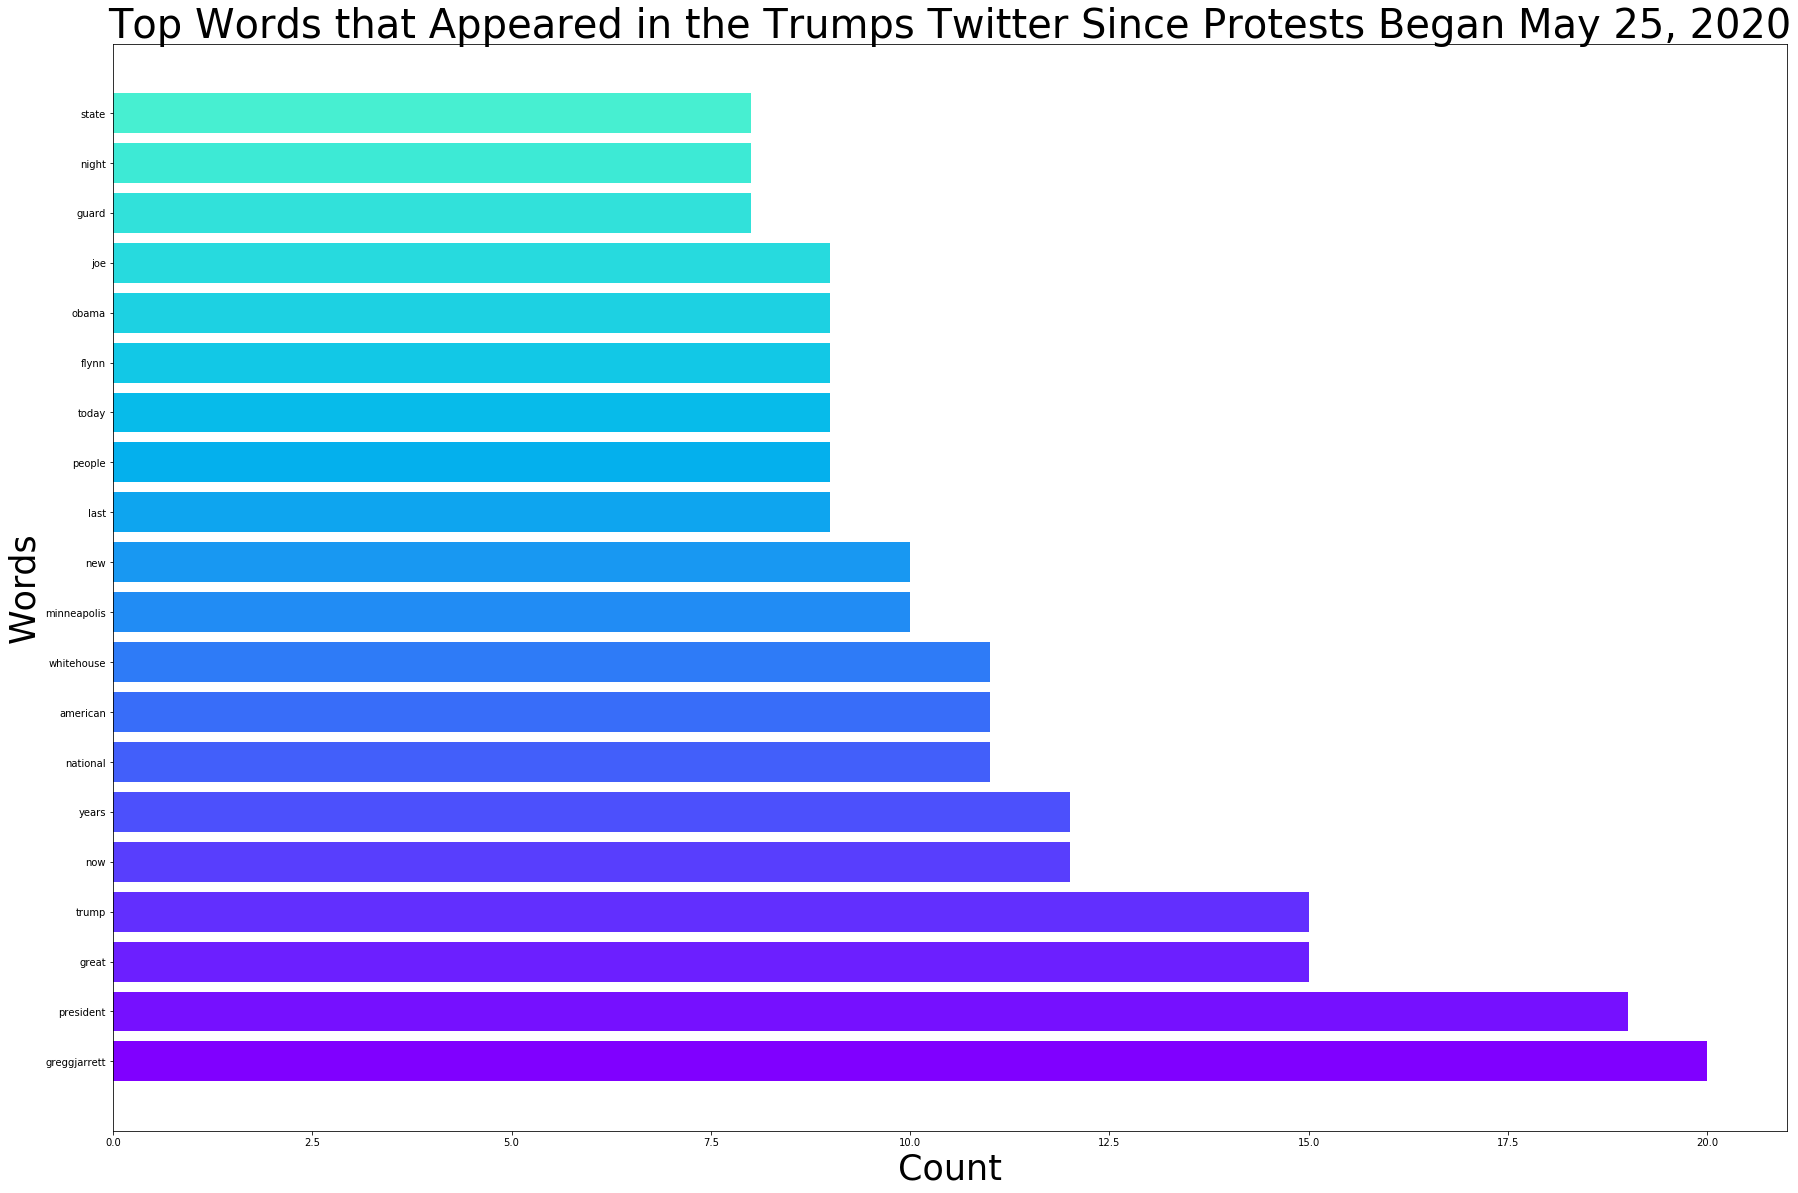

In [62]:
colors = cm.rainbow(np.linspace(0, 1, 50))


plt.figure(figsize=(30,20))
plt.title('Top Words that Appeared in the Trumps Twitter Since Protests Began May 25, 2020', fontsize = 40)
plt.xlabel('Count', size = 35)
plt.ylabel('Words', size = 35)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.barh(words_list, counts, color=colors)

plt.savefig("Visualizations/Top_20_Words_Since_May_25th_Graph")
plt.show()

## How Has Trump Used Twitter Since George Floyd and Subsequent Protests?

Following a string of activism and protests in the wake of the George Floyd murder by Minneapolis cops, Trump appears to have his mind on other things, although he does mention Minneapolis enough to be a top 20 word in his tweets. However, he seems to mention conservative news outlets that align with his ideals, alongside mentions of Obama and Joe Biden, political antagonists to him. It can be said that Trump cares more for talking about his political rivals rather than provide condolences or showing that he supports the protests in any way. He still likes to reiterate what a great job he is doing despite the current situation.